# Evaluation of the tours

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
best_path = "/home/stationlex/Dropbox/2019_x_Studium/TUWien/6_Sem/03_PSSAI/github/PSSAI_G15/ex1/tours/costs/"
rand_path = "/home/stationlex/Dropbox/2019_x_Studium/TUWien/6_Sem/03_PSSAI/github/PSSAI_G15/ex2/solutions_random/tours/costs/"
heur_path = "/home/stationlex/Dropbox/2019_x_Studium/TUWien/6_Sem/03_PSSAI/github/PSSAI_G15/ex2/solutions_heuristic/tours/costs/"
bestInit_path = "/home/stationlex/Dropbox/2019_x_Studium/TUWien/6_Sem/03_PSSAI/github/PSSAI_G15/ex2/solutions_from_known_best/tours/costs/"

In [16]:
def getValues(path):
    os.chdir(path)
    files = []

    for file in os.listdir():
        fpath = path + file
        f = open(fpath, 'r')

        splits = file.split('_')
        rest = ""
        for i in range(1, len(splits)):
            rest = rest + splits[i]
        files.append((splits[0], rest, int(f.read())))
        
    return files

In [17]:
best_files = sorted(getValues(best_path), key=lambda x : x[0])
rand_files = sorted(getValues(rand_path), key = lambda x : x[0])
heur_files = sorted(getValues(heur_path), key=lambda x : x[0])
bestInit_files = sorted(getValues(bestInit_path), key=lambda x : x[0])

In [18]:
wkd = "/home/stationlex/Dropbox/2019_x_Studium/TUWien/6_Sem/03_PSSAI/github/PSSAI_G15/ex2/src/figures"
os.chdir(wkd)

In [19]:
def WA_toy_files(files):
    wa_toy_files = []
    for file in files:
        if "WB" not in file[0]:
            wa_toy_files.append(file)
            
    return wa_toy_files

In [20]:
wa_best_files = WA_toy_files(best_files)
wa_rand_files = WA_toy_files(rand_files)
wa_heur_files = WA_toy_files(heur_files)
wa_bestInit_files = WA_toy_files(bestInit_files)

In [21]:
instances = []
best_costs = []
for contents in best_files:
    if "WB" not in contents[0]:
        instances.append(contents[0])
        best_costs.append(contents[2])

In [22]:
wa_toy_df = pd.DataFrame()
wa_toy_df['instances'] = instances
wa_toy_df = wa_toy_df.set_index('instances')
wa_toy_df['best'] = best_costs

# RAND

In [23]:
wa_rand_hill = []
wa_rand_randhill = []
wa_rand_evol0 = []
wa_rand_vns = []
wa_rand_simann = []

for contents in wa_rand_files:
    if 'hillclimber' == contents[1]:
        wa_rand_hill.append((contents[0], contents[2]))
    elif 'evolutionary0' == contents[1]:
        wa_rand_evol0.append((contents[0], contents[2]))
    elif 'vdns' == contents[1]:
        wa_rand_vns.append((contents[0], contents[2]))
    elif 'simmulatedannealing' == contents[1]:
        wa_rand_simann.append((contents[0], contents[2]))
    elif 'randomizedhillclimber' == contents[1]:
        wa_rand_randhill.append((contents[0], contents[2]))
        
rand_hill_name = 'rand-hill-climber'
rand_init_name = 'rand-rand-init-hill-climber'
rand_evol_name = 'rand-evolutionary'
rand_vns_name = 'rand-vns'
rand_sann_name = 'rand-simulated-annealing'

wa_toy_df[rand_hill_name] = 0
wa_toy_df[rand_init_name] = 0
wa_toy_df[rand_evol_name] = 0
wa_toy_df[rand_vns_name] = 0
wa_toy_df[rand_sann_name] = 0
            
for item in wa_rand_hill:
    wa_toy_df.loc[item[0],rand_hill_name] = item[1]
    
for item in wa_rand_randhill:
    wa_toy_df.loc[item[0],rand_init_name] = item[1]
    
for item in wa_rand_evol0:
    wa_toy_df.loc[item[0],rand_evol_name] = item[1]
    
for item in wa_rand_vns:
    wa_toy_df.loc[item[0],rand_vns_name] = item[1]
    
for item in wa_rand_simann:
    wa_toy_df.loc[item[0],rand_sann_name] = item[1]

    

# HEUR

In [24]:
wa_heur_hill = []
wa_heur_randhill = []
wa_heur_evol0 = []
wa_heur_vns = []
wa_heur_simann = []

for contents in wa_heur_files:
    if 'hillclimber' == contents[1]:
        wa_heur_hill.append((contents[0], contents[2]))
    elif 'evolutionary0' == contents[1]:
        wa_heur_evol0.append((contents[0], contents[2]))
    elif 'vdns' == contents[1]:
        wa_heur_vns.append((contents[0], contents[2]))
    elif 'simmulatedannealing' == contents[1]:
        wa_heur_simann.append((contents[0], contents[2]))
    elif 'randomizedhillclimber' == contents[1]:
        wa_heur_randhill.append((contents[0], contents[2]))
        
heur_hill_name = 'heur-hill-climber'
heur_init_name = 'heur-rand-init-hill-climber'
heur_evol_name = 'heur-evolutionary'
heur_vns_name = 'heur-vns'
heur_sann_name = 'heur-simulated-annealing'

if len(wa_heur_hill) > 0:
    wa_toy_df[heur_hill_name] = 0
    for item in wa_heur_hill:
        wa_toy_df.loc[item[0],heur_hill_name] = item[1]
        
        
if len(wa_heur_randhill) > 0:        
    wa_toy_df[heur_init_name] = 0
    for item in wa_heur_randhill:
        wa_toy_df.loc[item[0],heur_init_name] = item[1]
    
if len(wa_heur_evol0) > 0:
    wa_toy_df[heur_evol_name] = 0
    for item in wa_heur_evol0:
        wa_toy_df.loc[item[0],heur_evol_name] = item[1]

if len(wa_heur_vns) > 0:
    wa_toy_df[heur_vns_name] = 0
    for item in wa_heur_vns:
        wa_toy_df.loc[item[0],heur_vns_name] = item[1]

if len(wa_heur_simann) > 0:
    wa_toy_df[heur_sann_name] = 0
    for item in wa_heur_simann:
        wa_toy_df.loc[item[0],heur_sann_name] = item[1]
        

# FROM KNOWN BEST

In [25]:
wa_fkb_hill = []
wa_fkb_randhill = []
wa_fkb_evol0 = []
wa_fkb_vns = []
wa_fkb_simann = []

for contents in wa_bestInit_files:
    if 'hillclimber' == contents[1]:
        wa_fkb_hill.append((contents[0], contents[2]))
    elif 'evolutionary0' == contents[1]:
        wa_fkb_evol0.append((contents[0], contents[2]))
    elif 'vdns' == contents[1]:
        wa_fkb_vns.append((contents[0], contents[2]))
    elif 'simmulatedannealing' == contents[1]:
        wa_fkb_simann.append((contents[0], contents[2]))
    elif 'randomizedhillclimber' == contents[1]:
        wa_fkb_randhill.append((contents[0], contents[2]))
        
fkb_hill_name = 'fkb-hill-climber'
fkb_init_name = 'fkb-rand-init-hill-climber'
fkb_evol_name = 'fkb-evolutionary'
fkb_vns_name = 'fkb-vns'
fkb_sann_name = 'fkb-simulated-annealing'

if len(wa_fkb_hill) > 0:
    wa_toy_df[fkb_hill_name] = 0
    for item in wa_fkb_hill:
        wa_toy_df.loc[item[0], fkb_hill_name] = item[1]
        
        
if len(wa_fkb_randhill) > 0:        
    wa_toy_df[fkb_init_name] = 0
    for item in wa_fkb_randhill:
        wa_toy_df.loc[item[0],fkb_init_name] = item[1]
    
if len(wa_fkb_evol0) > 0:
    wa_toy_df[fkb_evol_name] = 0
    for item in wa_fkb_evol0:
        wa_toy_df.loc[item[0],fkb_evol_name] = item[1]

if len(wa_fkb_vns) > 0:
    wa_toy_df[fkb_vns_name] = 0
    for item in wa_fkb_vns:
        wa_toy_df.loc[item[0],fkb_vns_name] = item[1]

if len(wa_fkb_simann) > 0:
    wa_toy_df[fkb_sann_name] = 0
    for item in wa_fkb_simann:
        wa_toy_df.loc[item[0],fkb_sann_name] = item[1]

In [26]:
wa_toy_df

,best,rand-hill-climber,rand-rand-init-hill-climber,rand-evolutionary,rand-vns,rand-simulated-annealing,heur-hill-climber,heur-evolutionary,heur-vns,heur-simulated-annealing,fkb-hill-climber,fkb-evolutionary,fkb-vns,fkb-simulated-annealing
instances,,,,,,,,,,,,,,
WA0531,530782,1000802,971570,936040,1031096,1045240,591767,589188,589188,589188,546218,544809,530782,530782
WA0532,497704,930533,946909,875645,945949,1025089,562519,558013,557353,558013,510162,499421,497704,497704
WA0535,481554,963746,956341,871554,984912,1033364,549885,556613,542966,556613,495881,482889,481554,481554
WA0541,591697,1147216,1141748,1076373,1098162,1187917,656039,662104,650571,662104,598086,595386,591697,591697
WA0542,582057,1187908,1106415,1081900,1150433,1228019,639758,653804,636164,653804,589279,585826,582057,582057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WA3055,3821113,8546986,8649414,8802429,8628756,0,4369336,4352233,4352233,0,3821113,4352233,3821113,0
WA3062,4764824,10212261,10167795,10484351,10285862,0,5374777,5361114,5361114,0,4764824,5361114,4764824,0
WA3065,4423770,10348590,10273350,10371187,10166478,0,5041817,5030905,5030905,0,4425008,5030905,4423770,0


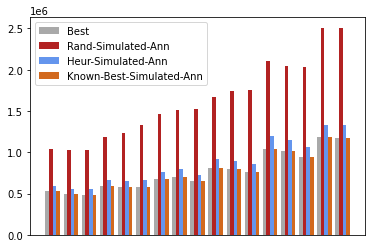

In [30]:
X = list(wa_toy_df.index)
X = np.arange(len(list(wa_toy_df.index)[0:17]))
data = [list(wa_toy_df['best'])[0:17],
        list(wa_toy_df['rand-simulated-annealing'])[0:17],
        list(wa_toy_df['heur-simulated-annealing'])[0:17],
        list(wa_toy_df['fkb-simulated-annealing'])[0:17]
        ]
plt.bar(X, data[0], color = 'darkgrey', width = 0.2)
plt.bar(X + 1 * 0.2, data[1], color = 'firebrick', width = 0.2)
plt.bar(X + 2 * 0.2, data[2], color = 'cornflowerblue', width = 0.2)
plt.bar(X + 3 * 0.2, data[3], color = 'chocolate', width = 0.2)
plt.legend(['Best','Rand-Simulated-Ann', 'Heur-Simulated-Ann','Known-Best-Simulated-Ann'])

ax = plt.gca()
ax.get_xaxis().set_ticks([])

plt.savefig('simulated-annealing.png', dpi = 1200)
plt.show()

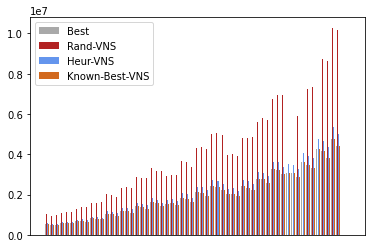

In [16]:
X = list(wa_toy_df.index)
X = np.arange(len(list(wa_toy_df.index)))
data = [list(wa_toy_df['best']),
        list(wa_toy_df['rand-vns']),
        list(wa_toy_df['heur-vns']),
        list(wa_toy_df['fkb-vns'])
        ]
plt.bar(X, data[0], color = 'darkgrey', width = 0.2)
plt.bar(X + 1 * 0.2, data[1], color = 'firebrick', width = 0.2)
plt.bar(X + 2 * 0.2, data[2], color = 'cornflowerblue', width = 0.2)
plt.bar(X + 3 * 0.2, data[3], color = 'chocolate', width = 0.2)
plt.legend(['Best','Rand-VNS', 'Heur-VNS','Known-Best-VNS'])

ax = plt.gca()
ax.get_xaxis().set_ticks([])

plt.savefig('vns.png', dpi = 1200)
plt.show()

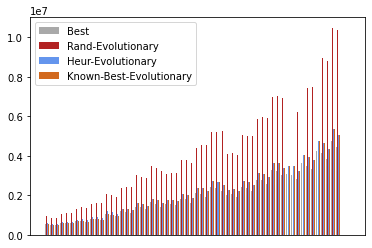

In [38]:
X = list(wa_toy_df.index)
X = np.arange(len(list(wa_toy_df.index)))
data = [list(wa_toy_df['best']),
        list(wa_toy_df['rand-evolutionary']),
        list(wa_toy_df['heur-evolutionary']),
        list(wa_toy_df['fkb-evolutionary'])
        ]
plt.bar(X, data[0], color = 'darkgrey', width = 0.2)
plt.bar(X + 1 * 0.2, data[1], color = 'firebrick', width = 0.2)
plt.bar(X + 2 * 0.2, data[2], color = 'cornflowerblue', width = 0.2)
plt.bar(X + 3 * 0.2, data[3], color = 'chocolate', width = 0.2)
plt.legend(['Best','Rand-Evolutionary', 'Heur-Evolutionary','Known-Best-Evolutionary'])

ax = plt.gca()
ax.get_xaxis().set_ticks([])

plt.savefig('evolutionary.png', dpi = 1200)
plt.show()

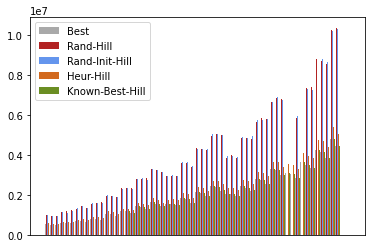

In [40]:
X = list(wa_toy_df.index)
X = np.arange(len(list(wa_toy_df.index)))
data = [list(wa_toy_df['best']),
        list(wa_toy_df['rand-hill-climber']),
        list(wa_toy_df['rand-rand-init-hill-climber']),
        list(wa_toy_df['heur-hill-climber']),
        list(wa_toy_df['fkb-hill-climber'])
        ]
plt.bar(X, data[0], color = 'darkgrey', width = 0.166)
plt.bar(X + 1 * 0.166, data[1], color = 'firebrick', width = 0.166)
plt.bar(X + 2 * 0.166, data[2], color = 'cornflowerblue', width = 0.166)
plt.bar(X + 3 * 0.166, data[3], color = 'chocolate', width = 0.166)
plt.bar(X + 4 * 0.166, data[4], color = 'olivedrab', width = 0.166)
plt.legend(['Best','Rand-Hill','Rand-Init-Hill','Heur-Hill','Known-Best-Hill'])

ax = plt.gca()
ax.get_xaxis().set_ticks([])

plt.savefig('hill-climbers.png', dpi = 1200)
plt.show()